In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import pymaster as nmt
import pickle as pl
import sys
sys.path.append('../')
from solat_cb.simulation import *
from solat_cb.spectra import *
from solat_cb.mle import *

## /!\ Warning
Foreground Cls might be unstable because I need to adjust the bmin parameter for each fit to avoid running into NaNs in the covariance

In [2]:
libdir          = '/pscratch/sd/l/lonappan/SOLAT'
nside           = 1024
atm_noise       = False
dust            = 1
sync            = 1
beta            = 0.3
alpha           = 0.3
nsplits         = 2
bp              = False
temp_bp         = False
pureB           = True
apo             = 2.0
CO              = True
PS              = True
nlb             = 20
bmin            = 50
bmax            = 3000
fit             = 'alpha'
alpha_per_split = True
rm_same_tube    = False
mode            = "ell" #cumulative is not working
s2n = S2N(libdir, mode, 
          nside, atm_noise, nsplits, dust, sync, temp_bp, 
          fit, bmin, bmax, alpha_per_split, rm_same_tube,
          bandpass=bp, aposcale=apo, CO=CO, PS=PS, pureB=pureB, binwidth=nlb,parallel=1)

CMB : INFO - Loading CMB power spectra from file
Noise : INFO - Noise Model: White noise v3.0.0
Spectra : INFO - Reading apodised mask from /pscratch/sd/l/lonappan/SOLAT/S2N/LAT_white_noise_2splits/spectra_1024_aposcale2p0_pureB_common/workspaces/mask_N1024_aposcale2p0_CO_PS.fits
Spectra : INFO - Reading coupling Matrix from /pscratch/sd/l/lonappan/SOLAT/S2N/LAT_white_noise_2splits/spectra_1024_aposcale2p0_pureB_common/workspaces/coupling_matrix_N1024_fsky0p55_aposcale2p0_CO_PS_pureB.fits
Spectra : INFO - Parallelized single loop
CMB : INFO - Loading CMB power spectra from file


Fitting a different polarisation angle per split


## Fit $\alpha$
When you only fit for polarization angles, both CMB and foregrounds source the signal. Hence the $S/N(\ell)$ shows the acoustic oscillations from the CMB spectra at $\ell\gtrsim 300$ and a bit of the power-law spectra of foregrounds at $\ell\lesssim 200$

#TODO: Check spectra to convince myself that the small contribution that foreground-dominated scales seem to have at >200GHz and <40GHz frequencies makes sense

In [3]:
eff_ell, s2n_ell = s2n.calculate()
plot_cmb = False

plt.figure() 

if plot_cmb:
    cl_ee = s2n.mle.cmb_cls['ee']
    ell   = np.arange(0, len(cl_ee), 1)
    plt.plot(ell[bmin:bmax], cl_ee[bmin:bmax]*2e3, '--', lw=3, color='gold')
    
counter = 0
for var in s2n_ell.keys():
    
    if var not in ['As','Ad','Asd', 'beta']:
        plt.plot(eff_ell, s2n_ell[var], color=plt.cm.tab20(counter), label=var)    
        counter += 1
        
if 'beta' in s2n.fit:
    plt.plot(eff_ell, s2n_ell['beta'], color='k', label='beta') 

plt.loglog()
plt.ylabel("S/N", fontsize=13)
#plt.ylim((1e-1, 1e1))
plt.xlabel(r"$\ell$", fontsize=13)
plt.legend(loc=(1.01, 0.1))
plt.title(s2n.fit, fontsize=15)
plt.show()

dust x obs spectra: 100%|██████████| 6/6 [19:35<00:00, 195.95s/band]   
/global/u2/l/lonappan/workspace/solat_cb/notebooks/../solat_cb/mle/snr.py:91: RuntimeWarning: invalid value encountered in sqrt
  std_ell = np.sqrt(np.diagonal(cov_ell, axis1=1, axis2=2))


NaN in covariance


UnboundLocalError: local variable 's2n' referenced before assignment

## Fit $\mathcal{A}_\mathrm{d} + \alpha$
Including a dust template should allow you to extract more information from dust. You should see more clearly the power-law spectra of dust at $\ell\lesssim 200$ for dust-dominated frequencies while synchrotron-dominated bands remain unaffected

#TODO: Check dust spectra because it might have a weird shape (not enough apodisation? more aggresive binning?) and it's not completely having the expected effect

Fitting a different polarisation angle per split


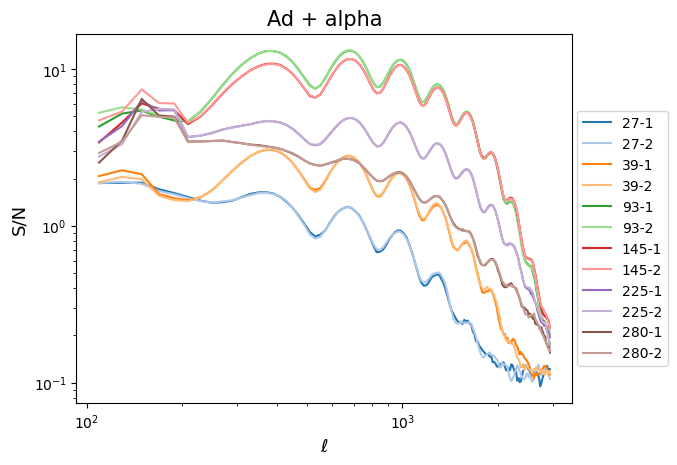

In [7]:
eff_ell, s2n_ell = s2n.calculate(fit='Ad + alpha', bmin=60)
plot_cmb = False

plt.figure() 

if plot_cmb:
    cl_ee = s2n.mle.cmb_cls['ee']
    ell   = np.arange(0, len(cl_ee), 1)
    plt.plot(ell[bmin:bmax], cl_ee[bmin:bmax]*2e3, '--', lw=3, color='gold')
    
counter = 0
for var in s2n_ell.keys():
    
    if var not in ['As','Ad','Asd', 'beta']:
        plt.plot(eff_ell, s2n_ell[var], color=plt.cm.tab20(counter), label=var)    
        counter += 1
        
if 'beta' in s2n.fit:
    plt.plot(eff_ell, s2n_ell['beta'], color='k', label='beta') 

plt.loglog()
plt.ylabel("S/N", fontsize=13)
#plt.ylim((1e-1, 1e1))
plt.xlabel(r"$\ell$", fontsize=13)
plt.legend(loc=(1.01, 0.1))
plt.title(s2n.fit, fontsize=15)
plt.show()



## Fit $\mathcal{A}_\mathrm{s} + \mathcal{A}_\mathrm{d} + \alpha$
Idem for synchrotron

#TODO: Check sync spectra because it might have a weird shape (not enough apodisation? more aggresive binning?) and it's not completely having the expected effect

Fitting a different polarisation angle per split


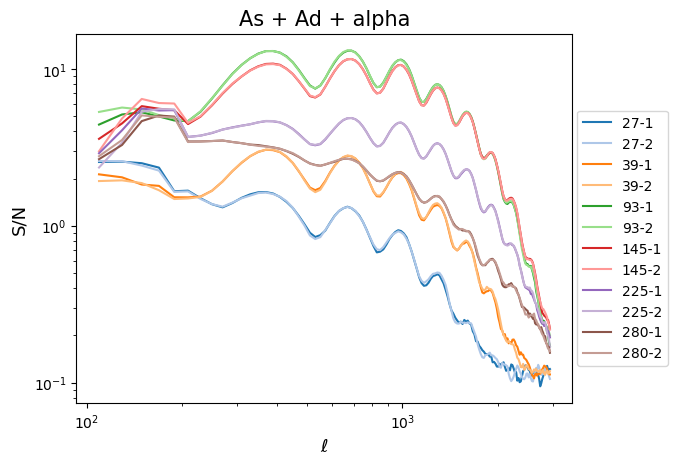

In [8]:
eff_ell, s2n_ell = s2n.calculate(fit='As + Ad + alpha', bmin=60)
plot_cmb = False

plt.figure() 

if plot_cmb:
    cl_ee = s2n.mle.cmb_cls['ee']
    ell   = np.arange(0, len(cl_ee), 1)
    plt.plot(ell[bmin:bmax], cl_ee[bmin:bmax]*2e3, '--', lw=3, color='gold')
    
counter = 0
for var in s2n_ell.keys():
    
    if var not in ['As','Ad','Asd', 'beta']:
        plt.plot(eff_ell, s2n_ell[var], color=plt.cm.tab20(counter), label=var)    
        counter += 1
        
if 'beta' in s2n.fit:
    plt.plot(eff_ell, s2n_ell['beta'], color='k', label='beta') 

plt.loglog()
plt.ylabel("S/N", fontsize=13)
#plt.ylim((1e-1, 1e1))
plt.xlabel(r"$\ell$", fontsize=13)
plt.legend(loc=(1.01, 0.1))
plt.title(s2n.fit, fontsize=15)
plt.show()



## Fit $\mathcal{A}_\mathrm{s} + \mathcal{A}_\mathrm{sd} + \mathcal{A}_\mathrm{d} + \alpha$

Fitting a different polarisation angle per split


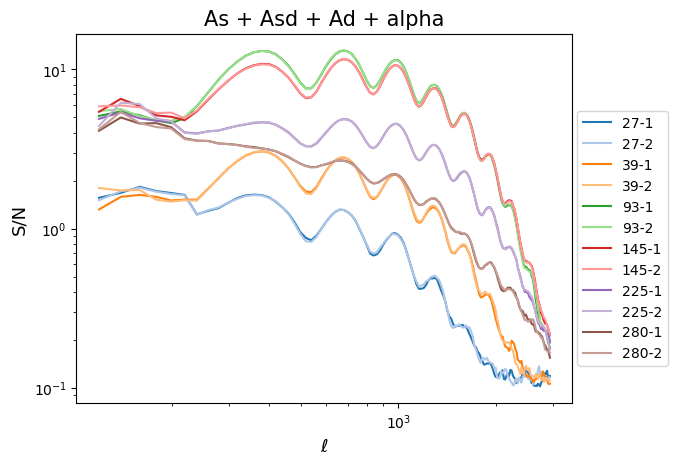

In [10]:
eff_ell, s2n_ell = s2n.calculate(fit='As + Asd + Ad + alpha', bmin=70)
plot_cmb = False

plt.figure() 

if plot_cmb:
    cl_ee = s2n.mle.cmb_cls['ee']
    ell   = np.arange(0, len(cl_ee), 1)
    plt.plot(ell[bmin:bmax], cl_ee[bmin:bmax]*2e3, '--', lw=3, color='gold')
    
counter = 0
for var in s2n_ell.keys():
    
    if var not in ['As','Ad','Asd', 'beta']:
        plt.plot(eff_ell, s2n_ell[var], color=plt.cm.tab20(counter), label=var)    
        counter += 1
        
if 'beta' in s2n.fit:
    plt.plot(eff_ell, s2n_ell['beta'], color='k', label='beta') 

plt.loglog()
#plt.semilogy()
plt.ylabel("S/N", fontsize=13)
#plt.ylim((1e-1, 1e1))
plt.xlabel(r"$\ell$", fontsize=13)
plt.legend(loc=(1.01, 0.1))
plt.title(s2n.fit, fontsize=15)
plt.show()



## Fit $\beta + \alpha$
For an unbiased estimation, both foregrounds and CMB can be a source of $S/N(\ell)$ for polarization angles while only the CMB should source the $S/N(\ell)$ for $\beta$. As I am not providing a foreground template to break the degeneracy yet, $\beta$ might erroneously source by foregrounds in this case.


#TODO: Interpretation

Fitting a different polarisation angle per split


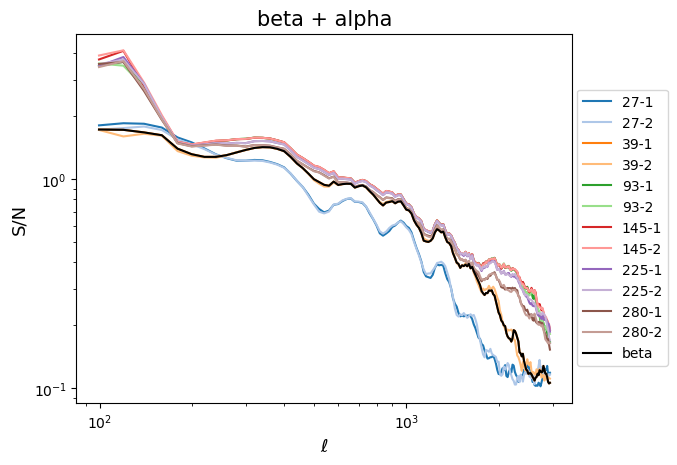

In [12]:
eff_ell, s2n_ell = s2n.calculate(fit='beta + alpha', bmin=bmin)
plot_cmb = False

plt.figure() 

if plot_cmb:
    cl_ee = s2n.mle.cmb_cls['ee']
    ell   = np.arange(0, len(cl_ee), 1)
    plt.plot(ell[bmin:bmax], cl_ee[bmin:bmax]*2e3, '--', lw=3, color='gold')
    
counter = 0
for var in s2n_ell.keys():
    
    if var not in ['As','Ad','Asd', 'beta']:
        plt.plot(eff_ell, s2n_ell[var], color=plt.cm.tab20(counter), label=var)    
        counter += 1
        
if 'beta' in s2n.fit:
    plt.plot(eff_ell, s2n_ell['beta'], color='k', label='beta') 

plt.loglog()
plt.ylabel("S/N", fontsize=13)
#plt.ylim((1e-1, 1e1))
plt.xlabel(r"$\ell$", fontsize=13)
plt.legend(loc=(1.01, 0.1))
plt.title(s2n.fit, fontsize=15)
plt.show()



## Fit $\mathcal{A}_\mathrm{d} + \beta + \alpha$

#TODO: Interpretation

Fitting a different polarisation angle per split


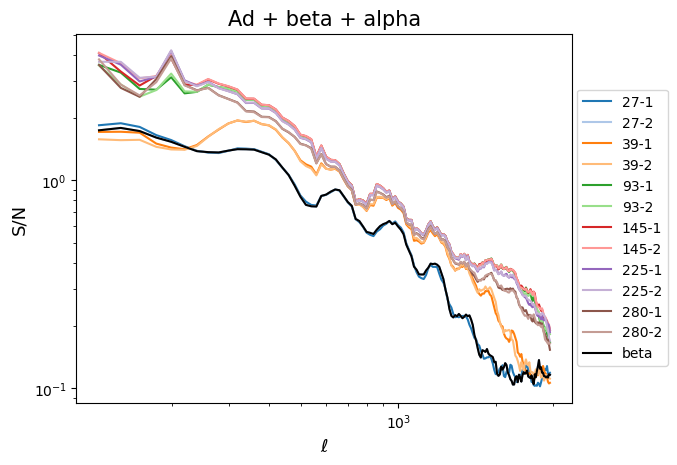

In [16]:
eff_ell, s2n_ell = s2n.calculate(fit='Ad + beta + alpha', bmin=70)
plot_cmb = False

plt.figure() 

if plot_cmb:
    cl_ee = s2n.mle.cmb_cls['ee']
    ell   = np.arange(0, len(cl_ee), 1)
    plt.plot(ell[bmin:bmax], cl_ee[bmin:bmax]*2e3, '--', lw=3, color='gold')
    
counter = 0
for var in s2n_ell.keys():
    
    if var not in ['As','Ad','Asd', 'beta']:
        plt.plot(eff_ell, s2n_ell[var], color=plt.cm.tab20(counter), label=var)    
        counter += 1
        
if 'beta' in s2n.fit:
    plt.plot(eff_ell, s2n_ell['beta'], color='k', label='beta') 

plt.loglog()
plt.ylabel("S/N", fontsize=13)
#plt.ylim((1e-1, 1e1))
plt.xlabel(r"$\ell$", fontsize=13)
plt.legend(loc=(1.01, 0.1))
plt.title(s2n.fit, fontsize=15)
plt.show()



## Fit $\mathcal{A}_\mathrm{s} + \mathcal{A}_\mathrm{d} + \beta + \alpha$

#TODO: Interpretation

Fitting a different polarisation angle per split


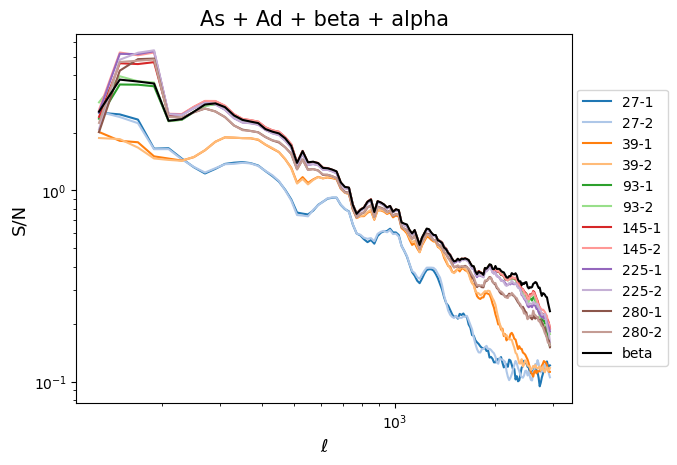

In [20]:
eff_ell, s2n_ell = s2n.calculate(fit='As + Ad + beta + alpha', bmin=80)
plot_cmb = False

plt.figure() 

if plot_cmb:
    cl_ee = s2n.mle.cmb_cls['ee']
    ell   = np.arange(0, len(cl_ee), 1)
    plt.plot(ell[bmin:bmax], cl_ee[bmin:bmax]*2e3, '--', lw=3, color='gold')
    
counter = 0
for var in s2n_ell.keys():
    
    if var not in ['As','Ad','Asd', 'beta']:
        plt.plot(eff_ell, s2n_ell[var], color=plt.cm.tab20(counter), label=var)    
        counter += 1
        
if 'beta' in s2n.fit:
    plt.plot(eff_ell, s2n_ell['beta'], color='k', label='beta') 

plt.loglog()
plt.ylabel("S/N", fontsize=13)
#plt.ylim((1e-1, 1e1))
plt.xlabel(r"$\ell$", fontsize=13)
plt.legend(loc=(1.01, 0.1))
plt.title(s2n.fit, fontsize=15)
plt.show()



## Fit $\mathcal{A}_\mathrm{s} + \mathcal{A}_\mathrm{sd} + \mathcal{A}_\mathrm{d} + \beta + \alpha$

#TODO: Interpretation

Fitting a different polarisation angle per split


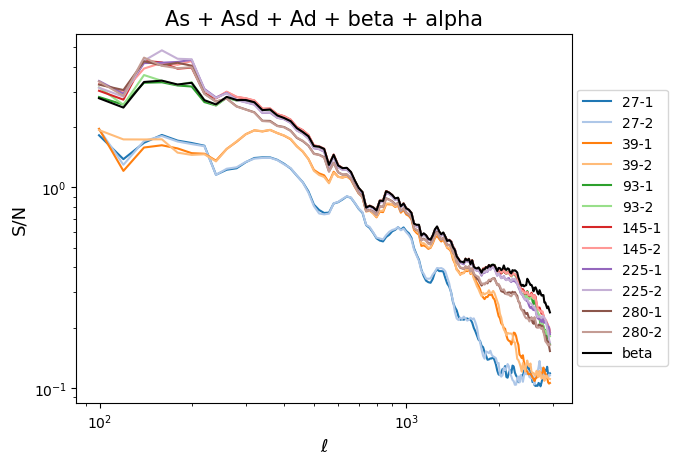

In [24]:
eff_ell, s2n_ell = s2n.calculate(fit='As + Asd + Ad + beta + alpha', bmin=50)
plot_cmb = False

plt.figure() 

if plot_cmb:
    cl_ee = s2n.mle.cmb_cls['ee']
    ell   = np.arange(0, len(cl_ee), 1)
    plt.plot(ell[bmin:bmax], cl_ee[bmin:bmax]*2e3, '--', lw=3, color='gold')
    
counter = 0
for var in s2n_ell.keys():
    
    if var not in ['As','Ad','Asd', 'beta']:
        plt.plot(eff_ell, s2n_ell[var], color=plt.cm.tab20(counter), label=var)    
        counter += 1
        
if 'beta' in s2n.fit:
    plt.plot(eff_ell, s2n_ell['beta'], color='k', label='beta') 

plt.loglog()
plt.ylabel("S/N", fontsize=13)
#plt.ylim((1e-1, 1e1))
plt.xlabel(r"$\ell$", fontsize=13)
plt.legend(loc=(1.01, 0.1))
plt.title(s2n.fit, fontsize=15)
plt.show()

